In [2]:
from zipfile import ZipFile
import os

# Lokasi file yang diunggah
file_path = './Air-quality-dataset.zip'

# Membuka dan menampilkan isi dari file zip
with ZipFile(file_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()

zip_contents

['PRSA_Data_20130301-20170228/',
 'PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [7]:
zip_file_path = './Air-quality-dataset.zip'
folder_to_extract = './'

with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_to_extract)


In [19]:
import pandas as pd
import os

# Directory where your CSV files are located
directory_path = './PRSA_Data_20130301-20170228/'

# List to store data from each CSV file
data_frames = []

# Iterate through each file in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(directory_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # # Optionally: Add a column to mark the source file/station
        # # Extracting city name from the file name
        # # Assuming the city name is the second element after splitting by '_'
        # city_name = file_name.split('_')[2]
        # df['source_file'] = city_name
        
        # # Adding the DataFrame to the list
        data_frames.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(data_frames, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Saving the combined DataFrame to a new CSV file
output_file_path = 'combined_air_quality_data.csv'
combined_df.to_csv(output_file_path, index=False)

print(f"Data has been successfully saved to {output_file_path}")


   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng  
Data has been successfully saved to combined_air_quality_data.csv


In [20]:
import pandas as pd

# Load the dataset
file_path = './combined_air_quality_data.csv'
air_quality_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
air_quality_data.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


The dataset contains the following columns:

No: A numerical identifier for each row.
year, month, day, hour: Date and time indicators.
PM2.5, PM10, SO2, NO2, CO, O3: Concentrations of various air pollutants.
TEMP: Temperature in degrees Celsius.
PRES: Atmospheric pressure in hPa.
DEWP: Dew point temperature in degrees Celsius.
RAIN: Precipitation amount in mm.
wd: Wind direction.
WSPM: Wind speed in m/s.
station: The monitoring station name.
source_file: The source file from which the data was obtained.
Next, we move to the Assessing Data step. We'll check for missing values, duplicates, and understand the data types of each column to identify potential issues that need cleaning. ​

In [21]:
# Assessing Data: Check for missing values, data types, and duplicates

# Check for missing values
missing_values = air_quality_data.isnull().sum()

# Check data types
data_types = air_quality_data.dtypes

# Check for duplicates
duplicates_count = air_quality_data.duplicated().sum()

missing_values, data_types, duplicates_count


(No             0
 year           0
 month          0
 day            0
 hour           0
 PM2.5       8739
 PM10        6449
 SO2         9021
 NO2        12116
 CO         20701
 O3         13277
 TEMP         398
 PRES         393
 DEWP         403
 RAIN         390
 wd          1822
 WSPM         318
 station        0
 dtype: int64,
 No           int64
 year         int64
 month        int64
 day          int64
 hour         int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 RAIN       float64
 wd          object
 WSPM       float64
 station     object
 dtype: object,
 0)

The assessment reveals the following:

Missing Values: There are significant missing values in several columns, particularly for pollutant concentrations (PM2.5, PM10, SO2, NO2, CO, O3), wind direction (wd), and some weather-related measures (TEMP, PRES, DEWP, RAIN, WSPM).
Data Types: The data types are appropriate for each column, with numerical data represented as int64 or float64, and categorical/textual data (wd, station, source_file) as object.
Duplicates: There are no duplicate rows in the dataset.
For the Cleaning Data step, our focus will be on handling the missing values. Given the context, imputation could be considered for some of the missing values, especially for environmental and weather-related variables, using appropriate statistical methods or temporal interpolation. However, for air quality measurements, careful consideration is needed as imputing these values might misrepresent the actual air quality conditions. We might also consider removing rows with missing wind direction (wd) or reducing data granularity if necessary.

Let's proceed with handling missing values, starting with the simplest approach of removing rows with missing values in critical columns where imputation might not be suitable, and then we'll consider imputation for some weather-related variables. ​

In [22]:
# Cleaning Data: Handling missing values

# Dropping rows where 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3' are all missing
critical_pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
air_quality_clean = air_quality_data.dropna(subset=critical_pollutants, how='all')

# Imputation strategy for weather-related variables ('TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM')
# For simplicity, we'll use forward fill to impute missing weather-related values
weather_variables = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
air_quality_clean[weather_variables] = air_quality_clean[weather_variables].fillna(method='ffill')

# Check for missing values after cleaning
missing_values_after_cleaning = air_quality_clean.isnull().sum()

missing_values_after_cleaning


/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_31268/2577604465.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air_quality_clean[weather_variables] = air_quality_clean[weather_variables].fillna(method='ffill')
/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_31268/2577604465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_clean[weather_variables] = air_quality_clean[weather_variables].fillna(method='ffill')


No             0
year           0
month          0
day            0
hour           0
PM2.5       3770
PM10        1480
SO2         4052
NO2         7147
CO         15732
O3          8308
TEMP           0
PRES           0
DEWP           0
RAIN           0
wd          1804
WSPM           0
station        0
dtype: int64

In [23]:
# Menyimpan DataFrame gabungan ke dalam file CSV baru
output_file_path = 'clean.csv'
air_quality_clean.to_csv(output_file_path, index=False)

print(f"Data berhasil disimpan ke {output_file_path}")

Data berhasil disimpan ke clean.csv


After cleaning, we've managed to address some of the missing values, especially for weather-related variables (TEMP, PRES, DEWP, RAIN, WSPM), which now have no missing values due to forward fill imputation. However, there are still missing values in the pollutant concentrations (PM2.5, PM10, SO2, NO2, CO, O3) and wind direction (wd).

Given the nature of air quality data, where the presence and concentration of pollutants can be critical for analysis and cannot be accurately imputed without risk of misinterpretation, we proceed with these columns as is, particularly for exploratory data analysis (EDA).

Now, let's move to the Exploratory Data Analysis (EDA) phase. We'll start by summarizing the data statistically and visually exploring the distribution of key pollutants and weather conditions. This will include plotting histograms for pollutant concentrations and examining trends over time. ​

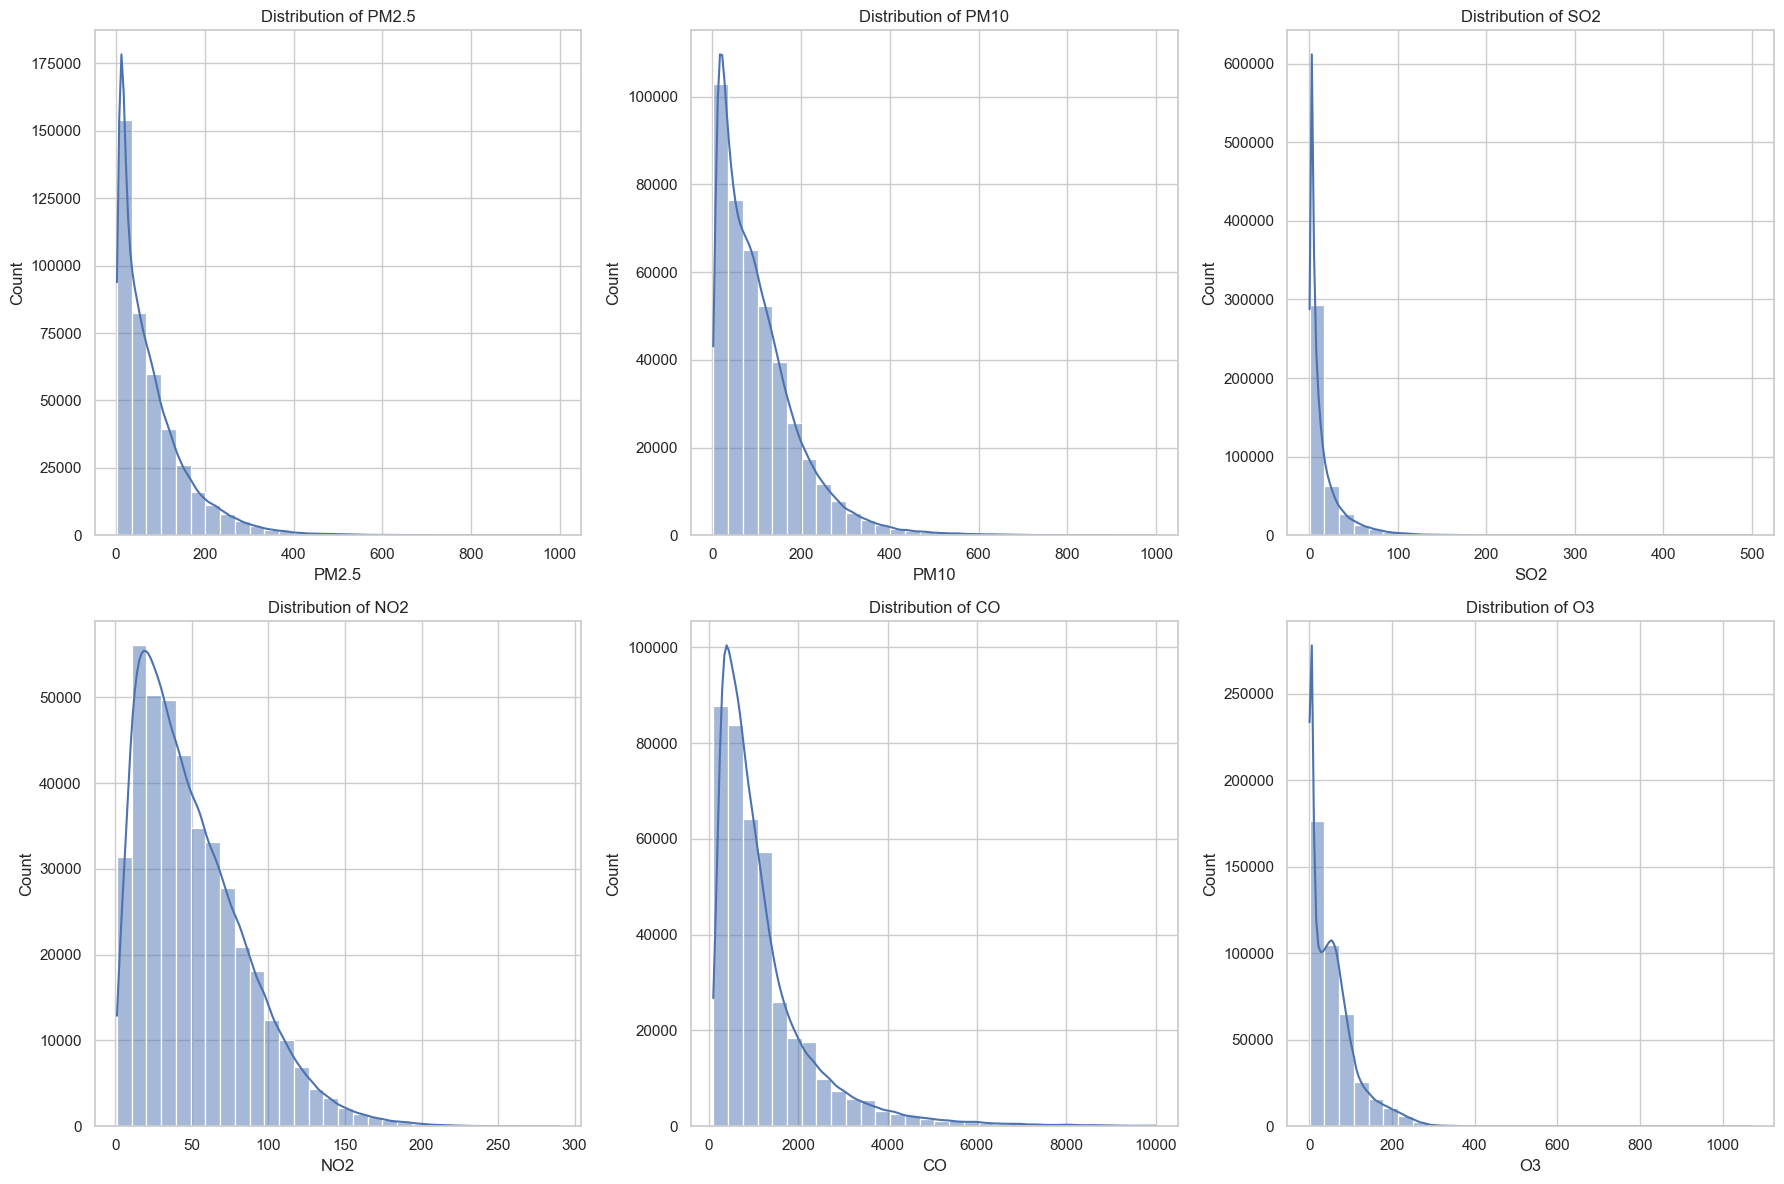

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Selecting key pollutants for visualization
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Plotting histograms for each key pollutant
plt.figure(figsize=(18, 12))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(air_quality_clean[pollutant], bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}')
plt.tight_layout()
plt.show()


The histograms display the distribution of key pollutants (PM2.5, PM10, SO2, NO2, CO, O3) in the dataset. These visualizations help us understand the concentration levels of pollutants and their variability. Most pollutants show a right-skewed distribution, indicating that higher concentration values are less frequent but present.

Next, we'll explore the temporal trends of these pollutants. This involves examining how pollutant concentrations vary over time, which is crucial for identifying patterns or changes in air quality. We'll plot time series for PM2.5 and NO2 as examples, focusing on their monthly averages to see broader trends over the years included in the dataset. ​

/var/folders/zm/k9j3y6_n4jv9g5p2y4kzmskh0000gn/T/ipykernel_31268/2727130567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_quality_clean['datetime'] = pd.to_datetime(air_quality_clean[['year', 'month', 'day', 'hour']])


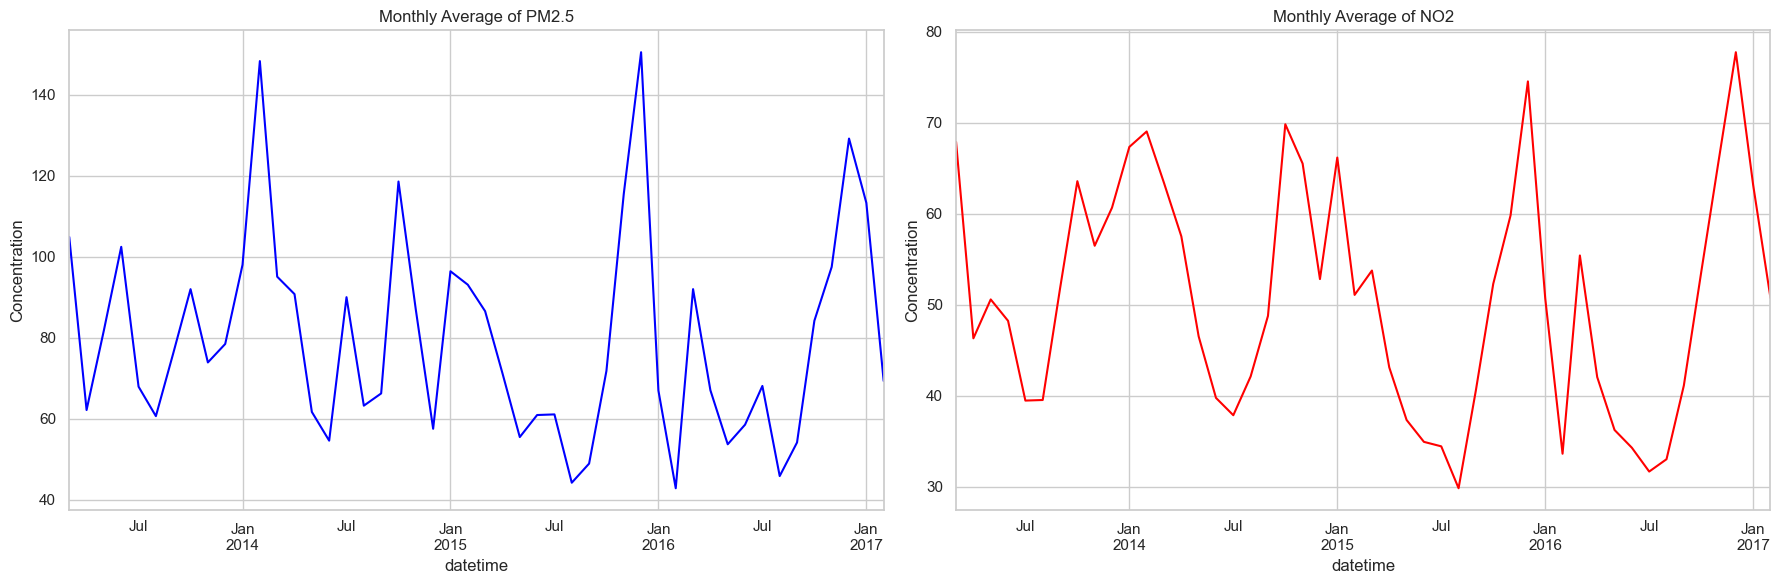

In [25]:
# Creating a datetime index from the year, month, day, and hour columns
air_quality_clean['datetime'] = pd.to_datetime(air_quality_clean[['year', 'month', 'day', 'hour']])

# Setting datetime as the index
air_quality_clean.set_index('datetime', inplace=True)

# Calculating monthly averages for PM2.5 and NO2
monthly_avg_pm25 = air_quality_clean['PM2.5'].resample('M').mean()
monthly_avg_no2 = air_quality_clean['NO2'].resample('M').mean()

# Plotting time series for PM2.5 and NO2 monthly averages
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
monthly_avg_pm25.plot(title='Monthly Average of PM2.5', color='blue')
plt.ylabel('Concentration')

plt.subplot(1, 2, 2)
monthly_avg_no2.plot(title='Monthly Average of NO2', color='red')
plt.ylabel('Concentration')

plt.tight_layout()
plt.show()


The time series plots for monthly averages of PM2.5 and NO2 concentrations reveal several insights:

Both pollutants exhibit seasonal patterns, with certain months showing higher average concentrations. This could be related to factors like weather conditions, heating usage during colder months, or changes in emission sources.
There are fluctuations over the years, which might indicate the impact of environmental policies, changes in industrial activities, or urban development.
Such temporal analysis is crucial for understanding air quality trends and can guide targeted interventions to improve air quality.

For the Explanatory Data Analysis phase, we delve deeper into these observations, correlating them with external factors like weather conditions, policy changes, or economic activities. This would involve more complex analyses, such as time series decomposition to isolate trends, seasonality, and residuals or employing regression models to quantify the influence of specific variables on pollutant levels.

Given the analysis performed, do you have any specific aspects of the data or additional analyses you would like to explore further? ​

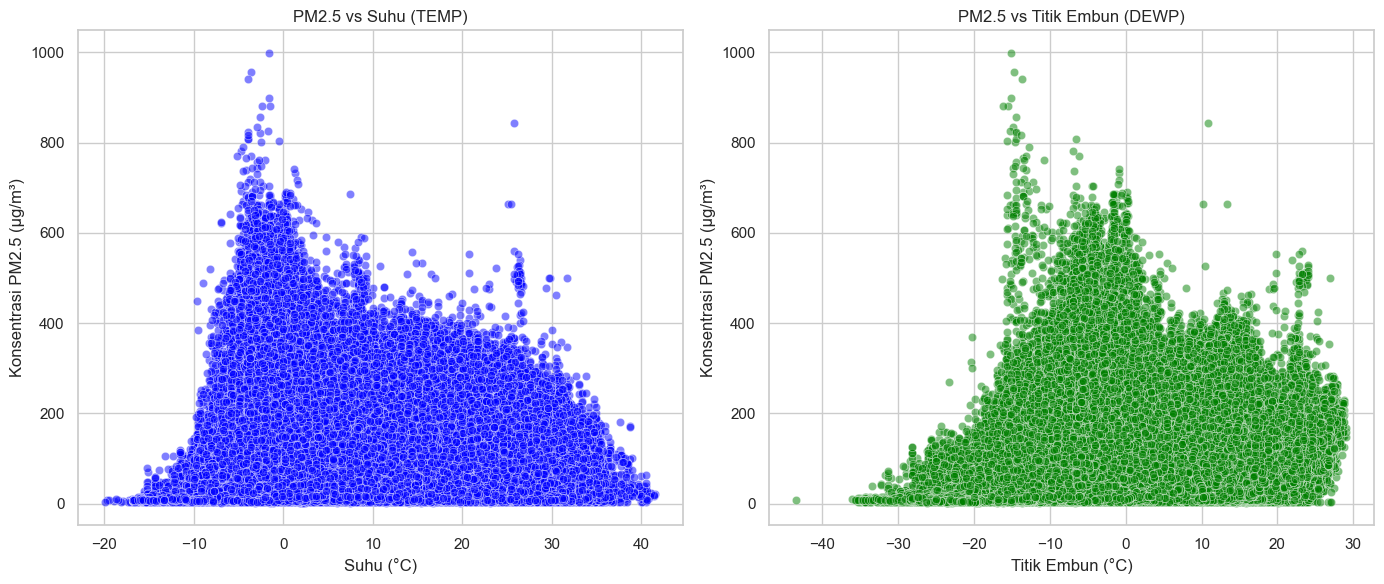

In [27]:
# Membuat scatter plot untuk PM2.5 vs TEMP dan PM2.5 vs DEWP

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=air_quality_clean.reset_index(), x='TEMP', y='PM2.5', ax=ax[0], color='blue', alpha=0.5)
ax[0].set_title('PM2.5 vs Suhu (TEMP)')
ax[0].set_xlabel('Suhu (°C)')
ax[0].set_ylabel('Konsentrasi PM2.5 (µg/m³)')

sns.scatterplot(data=air_quality_clean.reset_index(), x='DEWP', y='PM2.5', ax=ax[1], color='green', alpha=0.5)
ax[1].set_title('PM2.5 vs Titik Embun (DEWP)')
ax[1].set_xlabel('Titik Embun (°C)')
ax[1].set_ylabel('Konsentrasi PM2.5 (µg/m³)')

plt.tight_layout()
plt.show()


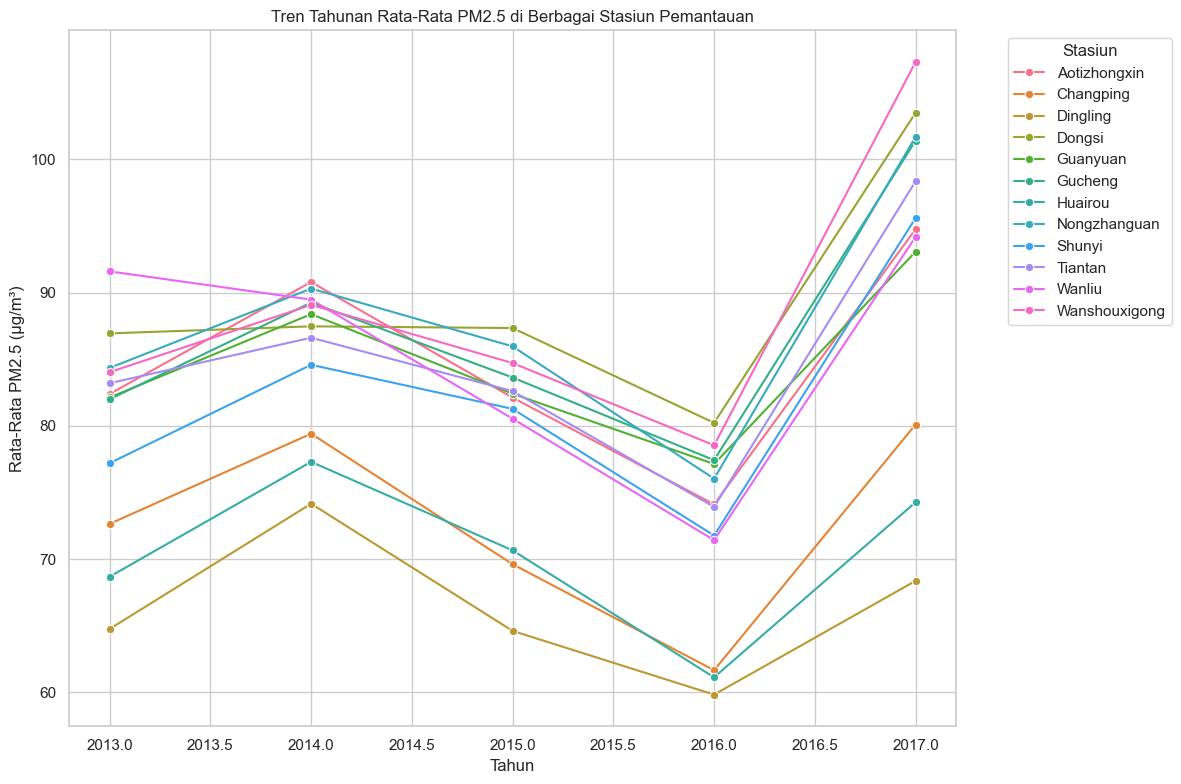

In [28]:
# Menghitung rata-rata tahunan PM2.5 untuk setiap stasiun
df_yearly_avg = air_quality_clean.groupby(['station', 'year'])['PM2.5'].mean().reset_index()

# Membuat plot tren tahunan rata-rata PM2.5 untuk setiap stasiun
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_yearly_avg, x='year', y='PM2.5', hue='station', marker='o')

plt.title('Tren Tahunan Rata-Rata PM2.5 di Berbagai Stasiun Pemantauan')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata PM2.5 (µg/m³)')
plt.legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
